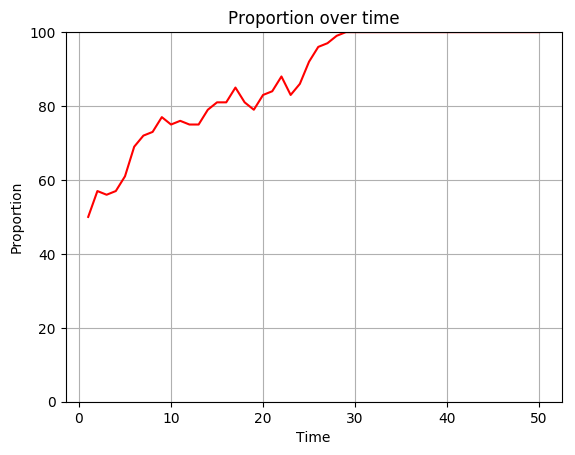

29

In [5]:
using PyPlot


function nextGeneration(vector, proportion)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic."""
    newProportion = 0
    for i in 1:length(vector)
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() > proportion/length(vector)
            vector[i] = 0
        else
            vector[i] = 1
            newProportion += 1
        end
    end
    return vector, newProportion
end


function trajectory(populationSize, initialProportion, finalTime, booleanPlot)
    """Run the Wright-Fisher model algorithm.
    finalTime is how many iterations you do.
    booleanPlot : true if you want to plot the trajectory, false if you do not."""
    
    populationVector = zeros(populationSize)
    listOfProportions = Float64[]
    infTimeAbsorption = 0
    
    # Initializing the population
    for i in 1:length(populationVector)
        if i > initialProportion
            populationVector[i] = 0
        else
            populationVector[i]
        end
    end
    
    # First proportion added to the plot
    push!(listOfProportions, initialProportion)

    for time in 2:finalTime
        
        populationVector, initialProportion = nextGeneration(populationVector, initialProportion)
        
        # Getting the time of absorption
        if (infTimeAbsorption == 0) && (initialProportion == 0 || initialProportion == populationSize)
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the plot
        push!(listOfProportions, initialProportion)
    end

    
    # Plot
    if (booleanPlot)
        ioff()

        listOfTimes = collect(1:finalTime)

        title("Proportion over time")
        xlabel("Time")
        ylabel("Proportion")
        ylim(0,populationSize)
        grid(true)

        plot(listOfTimes, listOfProportions, color="red")
    end
    
    # For now, it returns the time of absorption, 0 if there is none
    # It would be better to stop the for loop when you've reached absorption, but I'll leave it 
    # as it is right now so we have the core of the algorithm for when we will study selection and mutations.
    return infTimeAbsorption
end

#########################################################################################
# Mean of the Time Absorption using the law of large numbers
#########################################################################################

#Parameters
numberOfIterations = 2000 # iterations of the model
populationSize = 100
initialProportion = 50
finalTime = 100
booleanPlot = false

#For the plot
iterations = collect(1:numberOfIterations)
collectionOfTimeAbsorption = Float64[]
arithmeticMeanTimeAbsorption = Float64[]

#Algorithm

#Initialization
res = trajectory(populationSize, initialProportion, finalTime, booleanPlot)
push!(collectionOfTimeAbsorption, res)
push!(arithmeticMeanTimeAbsorption, res)

for i in 2:numberOfIterations
    res = trajectory(populationSize, initialProportion, finalTime, booleanPlot)
    push!(collectionOfTimeAbsorption, res)
    push!(arithmeticMeanTimeAbsorption, (arithmeticMeanTimeAbsorption[end]*(i-1)+res)/i)
end

title("Mean estimator of the Time Absorption (LLN)")
xlabel("Iterations of the algorithm")
ylabel("Mean of the Time Absorption over the iterations")
ylim(25,35) # to see better the limit
grid(true)
#plot(iterations, arithmeticMeanTimeAbsorption, color="red")


#########################################################################################
# Wright-Fisher Model with mutations
#########################################################################################

function mutations(vector, proportion, probability0to1, probability1to0)
    """Applying the mutations for a generation giver by its vector and its characteristic.
    probability0to1 is a fixed (float) number between 0 and 1 that represented the transition probability from 0 to 1.
    probability1to0 is a fixed (float) number between 0 and 1 that represented the transition probability from 1 to 0."""
    
    for j in 1:length(vector)
        if vector[j] == 0
            if rand() <= probability0to1
                vector[j] = 1
                proportion += 1
            end
        else
            if rand() <= probability1to0
                vector[j] = 0
                proportion -= 1
            end
        end
    end
    
    return vector, proportion
end

function nextGenerationMutations(vector, proportion, probability0to1, probability1to0)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic after applying mutations given by the two 
    transition probabilities probability0to1 and probability1to0."""
    
    #Applying the mutations
    vectorAfterMutations, proportionAfterMutations = mutations(vector, proportion, probability0to1, probability1to0) 
    
    #Producing the next generation
    return nextGeneration(vectorAfterMutations, proportionAfterMutations)
    
end

#########################################################################################
# Wright-Fisher Model with selection (1 is the state that dominates 0)
#########################################################################################

function nextGenerationSelection(vector, proportion, selectionFactor)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic after applying a selection.
    1 is the state that dominates the other. The selection factor is a fixed (float) number."""
    
    #There is a min needed if the proportion after the selection exceeds the size of the population.
    proportionAfterSelection = min(proportion*(1+selectionFactor), length(vector))
    
    #Producing the next generation
    return nextGeneration(vector, proportionAfterSelection)
    
end    

function trajectorySelection(populationSize, initialProportion, selectionFactor, finalTime, booleanPlot)
    """Iteration of the algorithm with a mutation.
    finalTime is how many iterations you do.
    booleanPlot : true if you want to plot the trajectory, false if you do not."""
    
    populationVector = zeros(populationSize)
    listOfProportions = Float64[]
    infTimeAbsorption = 0
    
    # Initializing the population
    for i in 1:length(populationVector)
        if i > initialProportion
            populationVector[i] = 0
        else
            populationVector[i]
        end
    end
    
    # First proportion added to the plot
    push!(listOfProportions, initialProportion)

    for time in 2:finalTime
        
        populationVector, initialProportion = nextGenerationSelection(populationVector, initialProportion, selectionFactor)
        
        # Getting the time of absorption
        if (infTimeAbsorption == 0) && (initialProportion == 0 || initialProportion == populationSize)
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the plot
        push!(listOfProportions, initialProportion)
    end

    
    # Plot
    if (booleanPlot)
        ioff()

        listOfTimes = collect(1:finalTime)

        title("Proportion over time")
        xlabel("Time")
        ylabel("Proportion")
        ylim(0,populationSize)
        grid(true)

        plot(listOfTimes, listOfProportions, color="red")
    end
    
    # For now, it returns the time of absorption, 0 if there is none
    # It would be better to stop the for loop when you've reached absorption, but I'll leave it 
    # as it is right now so we have the core of the algorithm for when we will study selection and mutations.
    return infTimeAbsorption
end

time = trajectorySelection(100, 50, 0.01, 50, true)
    